In [ ]:
!pip install -q ruptures darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 35.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.6/200.6 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 88.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.0/340.0 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 91.2 MB/s eta 0:00:00:00:0100:01
   ━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/24.6 MB 30.8 MB/s eta 0:00:01

# EDA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

In [4]:
# import of  the data
DATA_PATH= '/kaggle/input/brazaville-weather-dataset/brazzaville_weather_data_2000-08-01-2025-07-31.csv'
df = pd.read_csv(DATA_PATH , index_col = 0)
df.head()

,temperature_2m_max (°C),temperature_2m_min (°C),rain_sum (mm),relative_humidity_2m_max (%),relative_humidity_2m_min (%),wind_speed_10m_max (m/s),wind_speed_10m_min (m/s),wind_speed_10m_mean (m/s),relative_humidity_2m_mean (%),cloudcover_mean (%),surface_pressure_mean (hPa),precipitation_hours
date,,,,,,,,,,,,
2000-08-01 00:00:00+00:00,28.565,19.415000,0.0,92.19677,47.025530,3.623534,1.403567,2.433529,47.025530,95.041664,980.0657,0.0
2000-08-02 00:00:00+00:00,30.915,18.065000,0.0,94.20458,40.425007,2.729469,1.315295,1.950645,40.425007,71.583336,980.2625,0.0
2000-08-03 00:00:00+00:00,29.565,19.465000,0.0,86.84234,46.255207,3.014963,1.431782,2.150848,46.255207,97.333336,980.6682,0.0
2000-08-04 00:00:00+00:00,25.065,20.265001,0.0,86.37702,61.553474,3.848376,1.627882,2.622676,61.553474,98.833336,981.7378,0.0
2000-08-05 00:00:00+00:00,26.465,19.065000,0.0,92.75879,56.840874,3.590265,1.063015,2.003495,56.840874,86.791664,982.2934,0.0


In [5]:
# Dataset infos
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9131 entries, 2000-08-01 00:00:00+00:00 to 2025-07-31 00:00:00+00:00
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   temperature_2m_max (°C)        9130 non-null   float64
 1   temperature_2m_min (°C)        9130 non-null   float64
 2   rain_sum (mm)                  9130 non-null   float64
 3   relative_humidity_2m_max (%)   9130 non-null   float64
 4   relative_humidity_2m_min (%)   9130 non-null   float64
 5   wind_speed_10m_max (m/s)       9130 non-null   float64
 6   wind_speed_10m_min (m/s)       9130 non-null   float64
 7   wind_speed_10m_mean (m/s)      9130 non-null   float64
 8   relative_humidity_2m_mean (%)  9130 non-null   float64
 9   cloudcover_mean (%)            9130 non-null   float64
 10  surface_pressure_mean (hPa)    9130 non-null   float64
 11  precipitation_hours            9131 non-null   float64
dtypes: float

In [6]:
# Number of data in the dataset
print("Number of days in the dataset :" , len(df))

Number of days in the dataset : 9131


In [7]:
# data summaries
df.describe()

,temperature_2m_max (°C),temperature_2m_min (°C),rain_sum (mm),relative_humidity_2m_max (%),relative_humidity_2m_min (%),wind_speed_10m_max (m/s),wind_speed_10m_min (m/s),wind_speed_10m_mean (m/s),relative_humidity_2m_mean (%),cloudcover_mean (%),surface_pressure_mean (hPa),precipitation_hours
count,9130.000000,9130.000000,9130.000000,9130.000000,9130.000000,9130.000000,9130.000000,9130.000000,9130.000000,9130.000000,9130.000000,9131.000000
mean,30.009884,22.129495,3.196550,94.651591,58.357911,2.594259,0.636941,1.512377,58.357911,73.975424,979.307338,4.368087
std,1.559635,1.323651,6.036155,4.210953,10.363211,0.700117,0.463154,0.456687,10.363211,21.111357,1.509626,4.940676
min,22.665000,16.665000,0.000000,74.839570,26.101917,1.000000,0.000000,0.527137,26.101917,0.375000,973.642760,0.000000
25%,29.015001,21.565000,0.000000,92.566086,50.274351,2.061553,0.282843,1.170415,50.274351,60.916668,978.271750,0.000000
50%,30.039000,22.415000,0.600000,95.842455,59.083233,2.529822,0.500000,1.426714,59.083233,78.375000,979.295550,3.000000
75%,31.039000,23.015001,4.100000,97.633009,65.865252,3.061046,0.948683,1.804700,65.865252,91.541664,980.334192,7.000000
max,35.215000,25.389000,120.200000,100.000000,96.702710,6.414047,2.459675,3.322659,96.702710,100.000000,985.145200,24.000000


In [8]:
# any missing values ?
df.isna().sum()

temperature_2m_max (°C)          1
temperature_2m_min (°C)          1
rain_sum (mm)                    1
relative_humidity_2m_max (%)     1
relative_humidity_2m_min (%)     1
wind_speed_10m_max (m/s)         1
wind_speed_10m_min (m/s)         1
wind_speed_10m_mean (m/s)        1
relative_humidity_2m_mean (%)    1
cloudcover_mean (%)              1
surface_pressure_mean (hPa)      1
precipitation_hours              0
dtype: int64

In [9]:
# drop missing values
df = df.dropna()

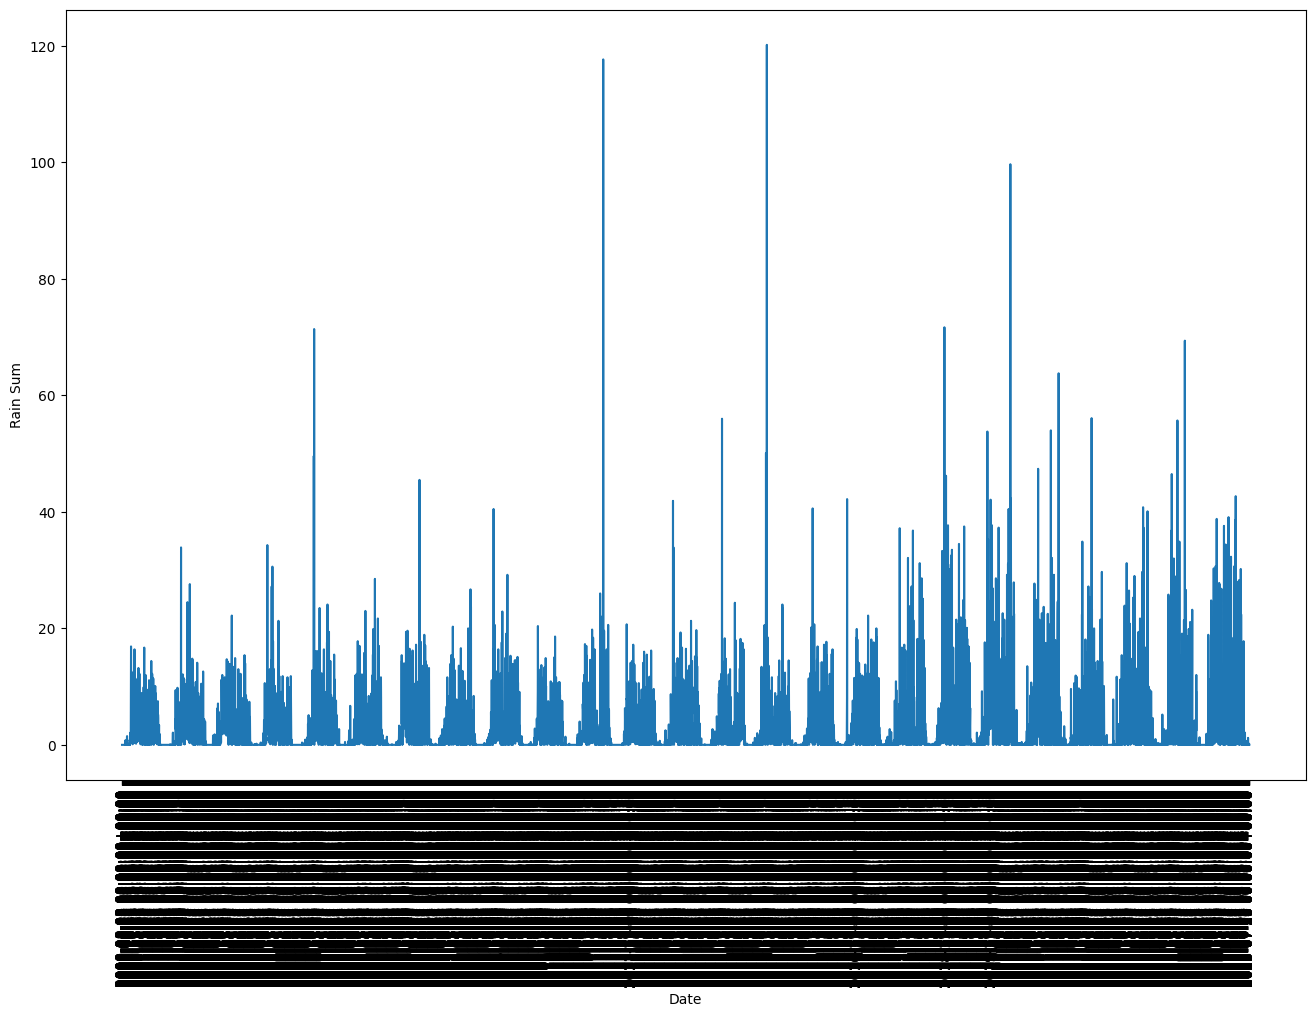

In [10]:
# let's plot our dependant variable the rain sum and see its evolution over time
plt.figure(figsize= (16,10))
plt.plot(df['rain_sum (mm)'])
plt.xlabel("Date")
plt.ylabel("Rain Sum")
plt.xticks(rotation=90)
plt.show()

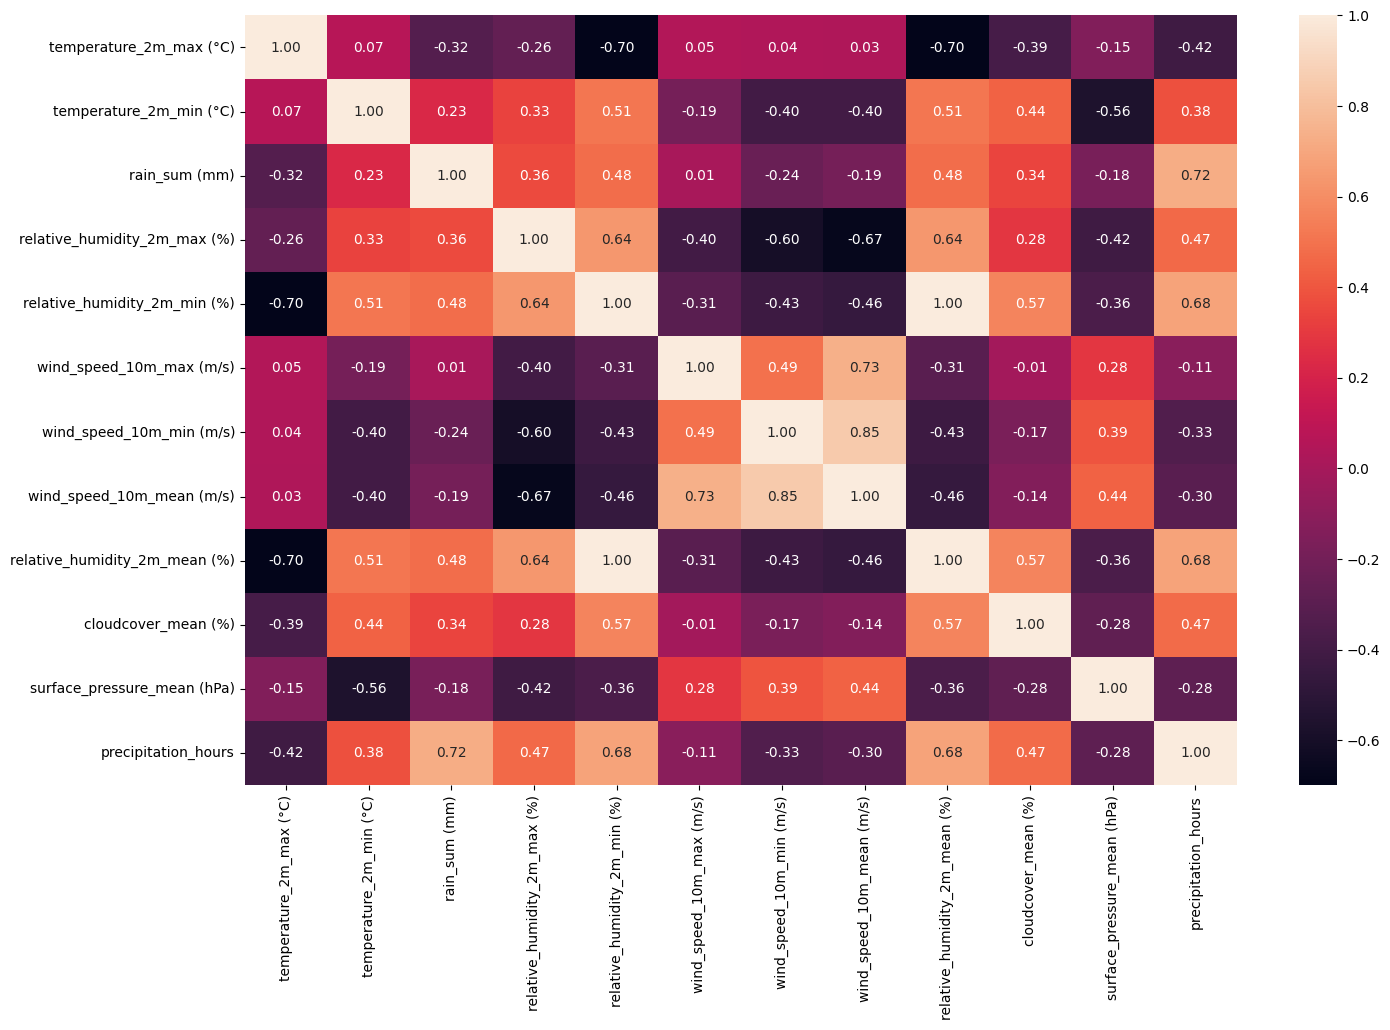

In [11]:
# correlations with other features
plt.figure(figsize = (16,10))
sns.heatmap(df.corr() ,annot=True , fmt= ".2f" )
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


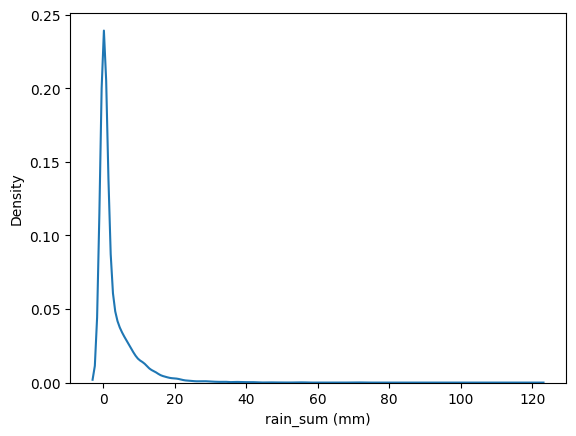

In [12]:
# Distribution of the rain_sum
sns.kdeplot(df["rain_sum (mm)"])
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


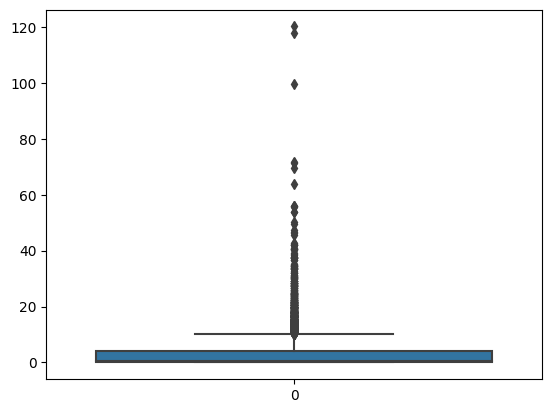

In [13]:
# Boxplot to check outliers
sns.boxplot(df['rain_sum (mm)'])
plt.show()

In [14]:
# Hom many days has it rain more than 20 mm 
len(df[df['rain_sum (mm)']>20])

190

In [15]:
# check for seasonality
def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("365D") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax


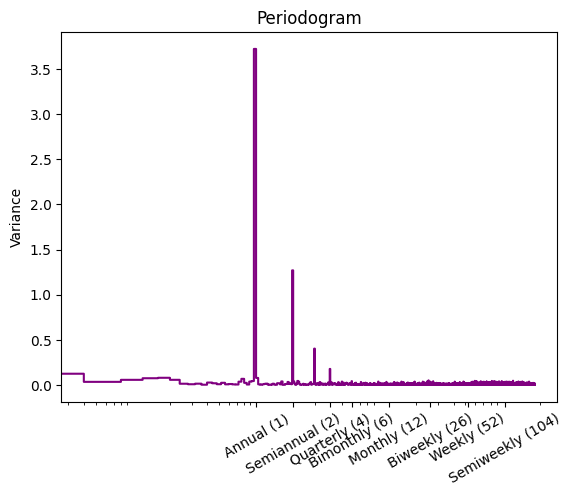

In [16]:
plot_periodogram(df["rain_sum (mm)"])
plt.show()

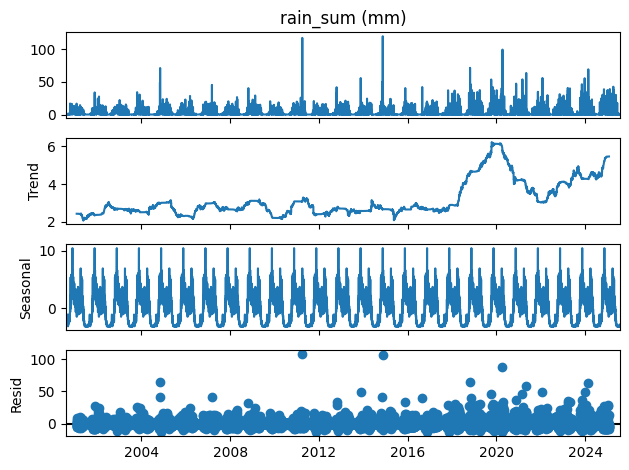

In [17]:
# seasonal plot of thr rain summ
df.index = pd.to_datetime(df.index)
result = seasonal_decompose(df['rain_sum (mm)'] , period=365)
result.plot()
plt.show()

In [18]:
# The rain seems to exhibate some seasonality , let's check the stationnarity of rain_sum

from statsmodels.tsa.stattools import adfuller

result = adfuller(df['rain_sum (mm)'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

if result[1] < 0.05:
    print("Series is stationary (reject H0: unit root)")
else:
    print("Series is non-stationary (fail to reject H0)")


ADF Statistic: -8.981723538143365
p-value: 7.279654318728983e-15
Series is stationary (reject H0: unit root)


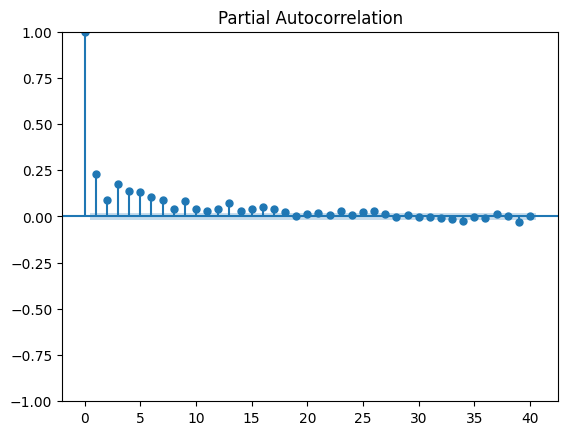

In [19]:
# Rain partial auto-correlation
plot_pacf(df['rain_sum (mm)'])
plt.show()

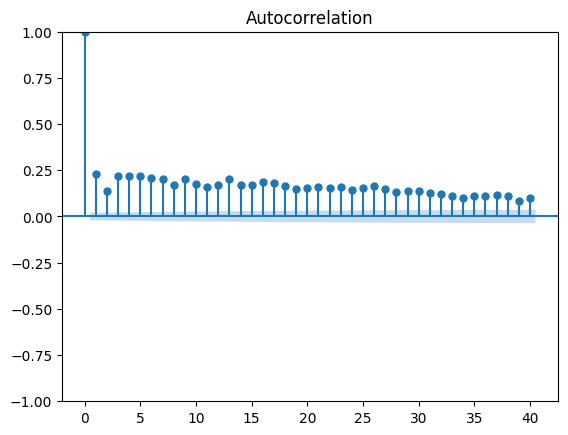

In [20]:
# Rain auto-correlation
plot_acf(df['rain_sum (mm)'])
plt.show()

The Autocorrelation Function (ACF) plot shows that rain values are significantly correlated with their past values for up to 40 lags. This suggests a strong temporal dependency — in other words, current rainfall is influenced by the amount of rain on many previous days.

The Partial Autocorrelation Function (PACF) plot, on the other hand, reveals that the most relevant direct dependencies lie within the first 12 lags. That means that, after accounting for the influence of intermediate days, rainfall from the previous 12 days still has a distinct impact on today’s rain.

This suggests that both short-term and long-term memory are important, making rain a process with substantial autocorrelation and justifying the use of historical values (lag , rolling mean etc) as predictive features.

📈 **Forecasting Rainfall for the Next 7 Days** 

To assess our forecasting models rigorously, we begin by defining a baseline model. All future models will be compared against this benchmark to ensure meaningful improvements.

✅ **Baseline Model: Seasonal Naïve**
We select the Seasonal Naïve model as our baseline due to the strong seasonal behavior and high frequency of zeros in the rainfall data.

* Why not linear interpolation?
Linear interpolation assumes a smooth and continuous change between values, which doesn't align with the discontinuous nature of rainfall (many sudden spikes and zeros).

How Seasonal Naïve works:
The model simply assumes that the value for a given day will be the same as the value on the same day of the previous season (e.g., previous week or previous year depending on granularity).

*For example*:
Rainfall on Tuesday this week ≈ Rainfall on Tuesday last week

🧪 **Train-Test Strategy**
* For statistical or rule-based models (ARIMA, Linear Regression):
80% training / 20% test
* For trainable models (CatBoost, Neural Nets, etc.):
70% training / 10% validation / 20% test

This allows:
* Model tuning on validation set
* Fair generalization check on unseen test data

📊 **Evaluation Metrics** 

* RMSE (Root Mean Squared Error)
Focuses on penalizing larger errors and gives a sense of average deviation in original units (mm of rain).

* MAE (Mean Absolute Error)
Less sensitive to outliers than MSE

* R² Score
Offers insight into how much variance is explained by the model. While sometimes unstable in time series, it provides a helpful interpretability perspective when used cautiously.



# Modeling

## Univariate  Modeling

In [21]:
# let's model the rain sum
from darts import TimeSeries
rain_series = TimeSeries.from_dataframe(df , value_cols=["rain_sum (mm)"])

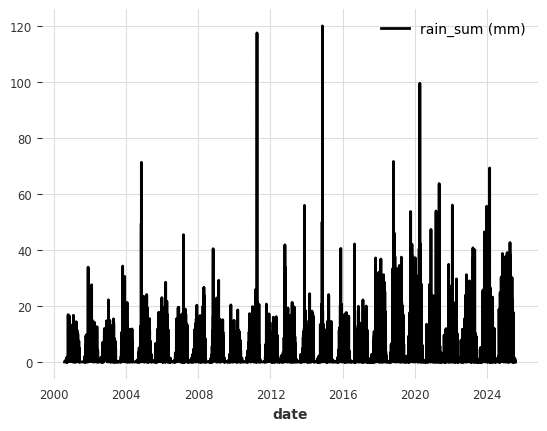

In [22]:
rain_series.plot()
plt.show()

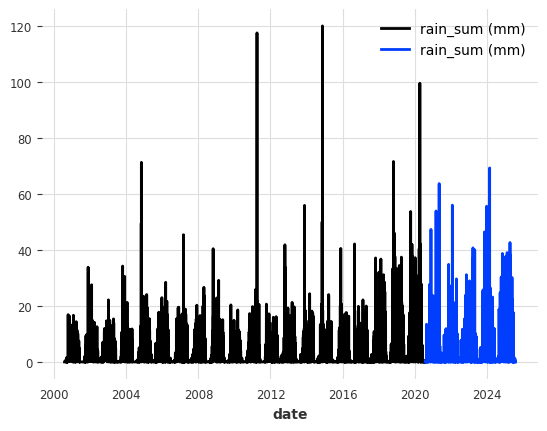

In [23]:
train_serie , test_serie = rain_series.split_after(0.80)
train_serie.plot()
test_serie.plot()
plt.show()

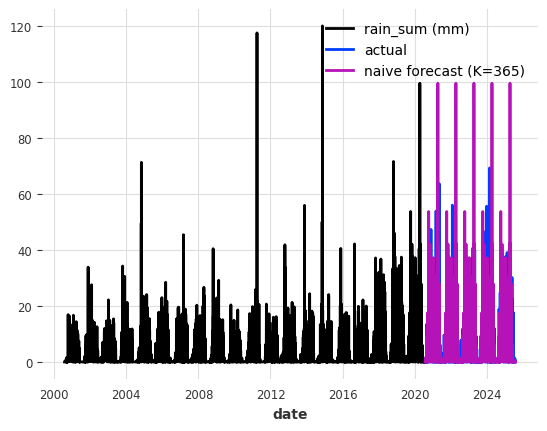

In [24]:
# fitting the baseline model
from darts.models import NaiveSeasonal

naive_model = NaiveSeasonal(K=365) #forecasting by attributing the same value as 365 days ago 
naive_model.fit(train_serie)
naive_forecast = naive_model.predict(1826)

train_serie.plot()
test_serie.plot(label="actual")
naive_forecast.plot(label="naive forecast (K=365)");

In [25]:
from darts.metrics import rmse, r2_score , mae

print("Baseline RMSE : " , rmse(test_serie , naive_forecast))
print("Baseline MAE : " , mae(test_serie , naive_forecast))

Baseline RMSE :  11.347382984392132
Baseline MAE :  6.2791347380722895


#### Perform forecasting via prediction stacking

In [26]:
# let's try several popular TS models
from darts.models import AutoARIMA, ExponentialSmoothing,Prophet , FFT , LinearRegressionModel ,RandomForest

def eval_model(model):
    model.fit(train_serie)
    forecast = model.predict(len(test_serie))
    print(f"model {model} obtains RMSE: {rmse(test_serie, forecast):.2f}")
    print(f"model {model} obtains MAE: {mae(test_serie, forecast):.2f}")
    print("/n")
    

# ES
eval_model(ExponentialSmoothing(seasonal_periods=365))

# ARIMA
eval_model(AutoARIMA())

# Prophet
eval_model( Prophet(
    add_seasonalities={
        'name':"annual_seasonality",
        'seasonal_periods':365,
        'fourier_order':4
        },
))

# Fast Fourrier Transform
eval_model(FFT( nr_freqs_to_keep=8))

# Linear Regression
eval_model(LinearRegressionModel(lags=1))

# Rndom Forest
eval_model(RandomForest(lags=10))

model ExponentialSmoothing(seasonal_periods=365) obtains RMSE: 7.07
model ExponentialSmoothing(seasonal_periods=365) obtains MAE: 4.17
/n
model AutoARIMA() obtains RMSE: 8.61
model AutoARIMA() obtains MAE: 4.21
/n


18:23:37 - cmdstanpy - INFO - Chain [1] start processing
18:23:38 - cmdstanpy - INFO - Chain [1] done processing


model Prophet(add_seasonalities={'name': 'annual_seasonality', 'seasonal_periods': 365, 'fourier_order': 4}) obtains RMSE: 8.06
model Prophet(add_seasonalities={'name': 'annual_seasonality', 'seasonal_periods': 365, 'fourier_order': 4}) obtains MAE: 6.59
/n
model FFT(nr_freqs_to_keep=8) obtains RMSE: 7.08
model FFT(nr_freqs_to_keep=8) obtains MAE: 3.87
/n
model LinearRegression() obtains RMSE: 7.63
model LinearRegression() obtains MAE: 4.63
/n
model RandomForestRegressor() obtains RMSE: 7.54
model RandomForestRegressor() obtains MAE: 5.24
/n


The best univariate's models are the ES and FFT which are models that are tuned to pick simple reapetable signals

The best-performing univariate models are Exponential Smoothing and Fast Fourier Transform, both of which are well-suited for capturing smooth and regular seasonal patterns.
This suggests that the rainfall data exhibits a relatively simple but strong seasonality that more flexible models like Random Forest, Linear Regression, ARIMA, and Prophet were unable to model effectively in their default configurations.
To better leverage this seasonality and improve model performance, we plan to introduce time-related features (e.g., month, day-of-year, lag variables) that can help other models recognize these repeating patterns.

Since they are simple models we  will use them as new baseline moving forward

In [27]:
from warnings import simplefilter
simplefilter(action="ignore")

In [28]:
# Complex models

## LightGBM 
from darts.models import LightGBMModel , CatBoostModel , XGBModel

lgb_model = LightGBMModel(
    lags=24,                      
    output_chunk_length=1,        
    n_estimators=300,             
    learning_rate=0.05,          
    max_depth=5,                  
    num_leaves=31,                
    random_state=42,              
    verbosity=-1,  
    early_stopping_rounds=50
)

lgb_model.fit(series=train_serie, val_series=test_serie,)
forecast = lgb_model.predict(len(test_serie))
print(f"model {lgb_model} obtains RMSE: {rmse(test_serie, forecast):.2f}")


## Catboost 
catboost_model = CatBoostModel(
    lags=24,                      
    output_chunk_length=1,        
    n_estimators=300,             
    learning_rate=0.05,          
    max_depth=5,                  
    num_leaves=31,                
    random_state=42,              
    verbose=-1,   
    early_stopping_rounds=50
)

catboost_model.fit(series=train_serie, val_series=test_serie,)
forecast = catboost_model.predict(len(test_serie))
print(f"model {catboost_model} obtains RMSE: {rmse(test_serie, forecast):.2f}")

## XGboost
xbg_model = XGBModel(
    lags=24,                      
    output_chunk_length=1,        
    n_estimators=300,             
    learning_rate=0.05,          
    max_depth=5,                  
    num_leaves=31,                
    random_state=42,              
    verbose=-1, 
    early_stopping_rounds=50
)

xbg_model.fit(series=train_serie, val_series=test_serie)
forecast = xbg_model.predict(len(test_serie))
print(f"model {xbg_model} obtains RMSE: {rmse(test_serie, forecast):.2f}")

model LGBMRegressor(early_stopping_rounds=50, learning_rate=0.05, max_depth=5,
              n_estimators=300, random_state=42, verbosity=-1) obtains RMSE: 7.52
model <catboost.core.CatBoostRegressor object at 0x7d59769986d0> obtains RMSE: 7.72
[0]	validation_0-rmse:7.63314
[1]	validation_0-rmse:7.59210
[2]	validation_0-rmse:7.55801
[3]	validation_0-rmse:7.51978
[4]	validation_0-rmse:7.48876
[5]	validation_0-rmse:7.45598
[6]	validation_0-rmse:7.42607
[7]	validation_0-rmse:7.40333
[8]	validation_0-rmse:7.38136
[9]	validation_0-rmse:7.36020
[10]	validation_0-rmse:7.35072
[11]	validation_0-rmse:7.33706
[12]	validation_0-rmse:7.31887
[13]	validation_0-rmse:7.30687
[14]	validation_0-rmse:7.29908
[15]	validation_0-rmse:7.28636
[16]	validation_0-rmse:7.27865
[17]	validation_0-rmse:7.28670
[18]	validation_0-rmse:7.28330
[19]	validation_0-rmse:7.28197
[20]	validation_0-rmse:7.27538
[21]	validation_0-rmse:7.27096
[22]	validation_0-rmse:7.26355
[23]	validation_0-rmse:7.25658
[24]	validation_0-rms

#### Perform prediction via multi-step forecasting

In [29]:
# Simple models
eval_model(LinearRegressionModel(lags=1, output_chunk_length=7))
eval_model(RandomForest(lags=10, output_chunk_length=7))


model LinearRegression() obtains RMSE: 7.63
model LinearRegression() obtains MAE: 4.63
/n
model RandomForestRegressor() obtains RMSE: 7.59
model RandomForestRegressor() obtains MAE: 5.56
/n


In [30]:
# Ensemble Models

# Complex models

## LightGBM 
from darts.models import LightGBMModel , CatBoostModel , XGBModel

lgb_model = LightGBMModel(
    lags=24,                      
    output_chunk_length=7,        
    n_estimators=300,             
    learning_rate=0.05,          
    max_depth=5,                  
    num_leaves=31,                
    random_state=42,              
    verbosity=-1,  
    early_stopping_rounds=50,
    multi_models=False
)

lgb_model.fit(series=train_serie, val_series=test_serie,)
forecast = lgb_model.predict(len(test_serie))
print(f"model {lgb_model} obtains RMSE: {rmse(test_serie, forecast):.2f}")


## Catboost 
catboost_model = CatBoostModel(
    lags=24,                      
    output_chunk_length=7,        
    n_estimators=300,             
    learning_rate=0.05,          
    max_depth=5,                  
    num_leaves=31,                
    random_state=42,              
    verbose=-1,   
    early_stopping_rounds=50,
    multi_models=False
)

catboost_model.fit(series=train_serie, val_series=test_serie,)
forecast = catboost_model.predict(len(test_serie))
print(f"model {catboost_model} obtains RMSE: {rmse(test_serie, forecast):.2f}")

## XGboost
xbg_model = XGBModel(
    lags=24,                      
    output_chunk_length=7,        
    n_estimators=300,             
    learning_rate=0.05,          
    max_depth=5,                  
    num_leaves=31,                
    random_state=42,              
    verbose=-1, 
    early_stopping_rounds=50,
    multi_models=False
)

xbg_model.fit(series=train_serie, val_series=test_serie)
forecast = xbg_model.predict(len(test_serie))
print(f"model {xbg_model} obtains RMSE: {rmse(test_serie, forecast):.2f}")

model LGBMRegressor(early_stopping_rounds=50, learning_rate=0.05, max_depth=5,
              n_estimators=300, random_state=42, verbosity=-1) obtains RMSE: 7.51
model <catboost.core.CatBoostRegressor object at 0x7d59773dad50> obtains RMSE: 7.62
[0]	validation_0-rmse:7.64456
[1]	validation_0-rmse:7.61521
[2]	validation_0-rmse:7.58556
[3]	validation_0-rmse:7.56422
[4]	validation_0-rmse:7.54000
[5]	validation_0-rmse:7.52062
[6]	validation_0-rmse:7.49827
[7]	validation_0-rmse:7.47836
[8]	validation_0-rmse:7.46466
[9]	validation_0-rmse:7.45333
[10]	validation_0-rmse:7.43774
[11]	validation_0-rmse:7.42462
[12]	validation_0-rmse:7.41868
[13]	validation_0-rmse:7.40735
[14]	validation_0-rmse:7.39296
[15]	validation_0-rmse:7.38336
[16]	validation_0-rmse:7.38198
[17]	validation_0-rmse:7.38111
[18]	validation_0-rmse:7.38076
[19]	validation_0-rmse:7.37174
[20]	validation_0-rmse:7.36144
[21]	validation_0-rmse:7.35044
[22]	validation_0-rmse:7.35367
[23]	validation_0-rmse:7.35584
[24]	validation_0-rms

No significant changes

## Multivariate Forecasting 

In [31]:
def eval_model(model):
    model.fit(train_serie ,past_covariates = train_past_covariates)
    forecast = model.predict(len(test_serie) , past_covariates = test_past_covariates)
    print(f"model {model} obtains RMSE: {rmse(test_serie, forecast):.2f}")
    print(f"model {model} obtains MAE: {mae(test_serie, forecast):.2f}")
    print("/n")


In [32]:
past_covariates = TimeSeries.from_dataframe(df.drop(['rain_sum (mm)'] , axis=1))
train_past_covariates , test_past_covariates = past_covariates.split_after(0.80)

In [33]:
test_past_covariates= past_covariates[-len(test_past_covariates)-12:]

In [34]:
linear_model = LinearRegressionModel(
    lags=1,
    lags_past_covariates=10,
    output_chunk_length=1,
)
eval_model(linear_model)

model LinearRegression() obtains RMSE: 6.90
model LinearRegression() obtains MAE: 4.40
/n


In [35]:
rf_model =  RandomForest(lags=1,
                        lags_past_covariates=5,
                        output_chunk_length=1,
                        n_estimators =200)

eval_model(rf_model)

model RandomForestRegressor(n_estimators=200) obtains RMSE: 7.97
model RandomForestRegressor(n_estimators=200) obtains MAE: 5.89
/n


In [36]:
lgb_model = LightGBMModel(
    lags=1, 
    lags_past_covariates = 3,
    output_chunk_length=1,   
    objective= "tweedie",
    tweedie_variance_power= 1.5,         
    learning_rate=0.05,          
    max_depth=5,                  
    num_leaves=31,                
    random_state=42,              
    verbosity=-1,  
    multi_models=True
)

catboost_model = CatBoostModel(
    lags=1,      
    lags_past_covariates = 4,
    output_chunk_length=1,        
    n_estimators=300,             
    learning_rate=0.05,          
    max_depth=5,                  
    num_leaves=31,                
    random_state=42,              
    verbose=-1,   
    multi_models=True
)

xbg_model = XGBModel(
    lags=2,   
    lags_past_covariates = 4,
    output_chunk_length=1,   
    objective= "reg:tweedie",
    tweedie_variance_power= 1.5, 
    n_estimators=300,             
    learning_rate=0.05,          
    max_depth=5,                  
    num_leaves=31,                
    random_state=42,              
    verbose=-1, 
    multi_models=True
)


eval_model(lgb_model)
eval_model(catboost_model)
eval_model(xbg_model)


model LGBMRegressor(learning_rate=0.05, max_depth=5, objective='tweedie',
              random_state=42, tweedie_variance_power=1.5, verbosity=-1) obtains RMSE: 6.96
model LGBMRegressor(learning_rate=0.05, max_depth=5, objective='tweedie',
              random_state=42, tweedie_variance_power=1.5, verbosity=-1) obtains MAE: 4.06
/n
model <catboost.core.CatBoostRegressor object at 0x7d59762f2550> obtains RMSE: 6.91
model <catboost.core.CatBoostRegressor object at 0x7d59762f2550> obtains MAE: 4.37
/n
model XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             ma

New Best Model : Catboost RMSE 6.83
But Linear Regression is not far behind with 6.90
Let's perform feature selection to only keep the relevant features

### Feature selection

In [37]:
def fourier_features(index, freq, order):
    time = np.arange(len(index), dtype=np.float32)
    k = 2 * np.pi * (1 / freq) * time
    features = {}
    for i in range(1, order + 1):
        features.update({
            f"sin_{freq}_{i}": np.sin(i * k),
            f"cos_{freq}_{i}": np.cos(i * k),
        })
    return pd.DataFrame(features, index=index)

fourrier_df = fourier_features(df.index , 365.25,4)

In [38]:
df['day_of_the_year'] = df.index.dayofyear
seasonnal_df = pd.concat([fourrier_df,df] , axis=1)

In [39]:
col_to_keep = ['temperature_2m_max (°C)',   
        'wind_speed_10m_min (m/s)', 'surface_pressure_mean (hPa)',
               'precipitation_hours', 'day_of_the_year','cos_365.25_1','cos_365.25_2' ]


In [40]:
past_covariates = TimeSeries.from_dataframe(seasonnal_df[col_to_keep])
train_past_covariates , test_past_covariates = past_covariates.split_after(0.80)

test_past_covariates= past_covariates[-len(test_past_covariates)-12:]

eval_model(catboost_model)

model <catboost.core.CatBoostRegressor object at 0x7d59762f2550> obtains RMSE: 6.77
model <catboost.core.CatBoostRegressor object at 0x7d59762f2550> obtains MAE: 3.91
/n


In [41]:
from darts.explainability import ShapExplainer

explainer = ShapExplainer(catboost_model)  
explain_results = explainer.explain()


#shap_objects = explain_results.get_shap_explanation_objects(horizon=1)

2025-08-09 18:26:53.270349: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754764013.515784      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754764013.591484      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


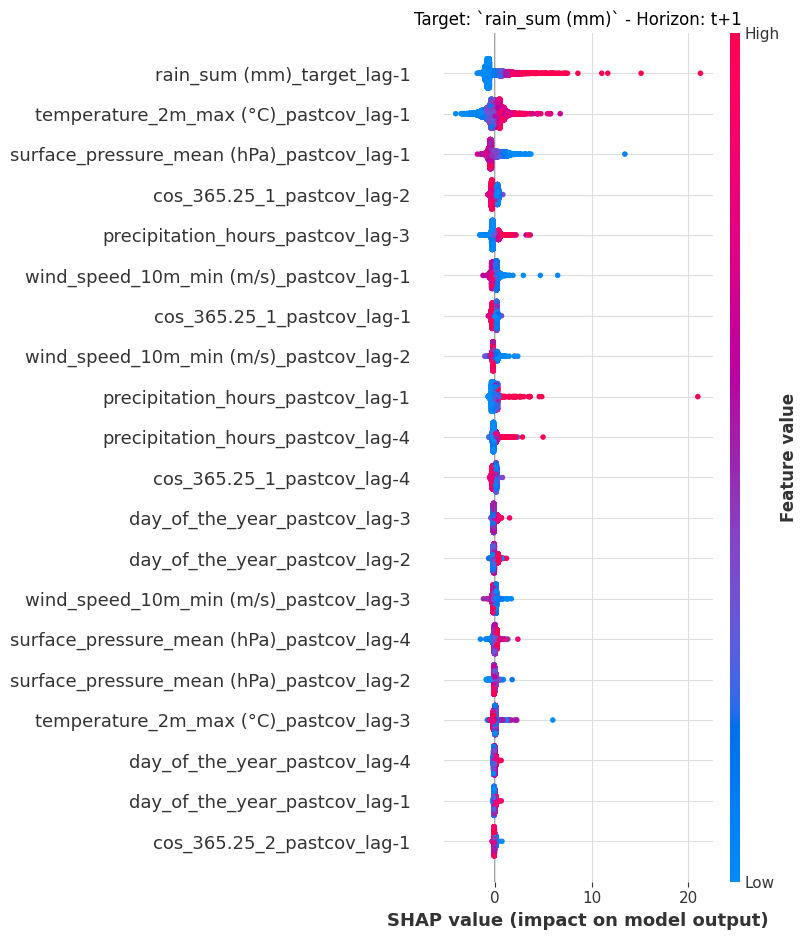

{1: {'rain_sum (mm)': .values =
  array([[-0.55669722,  0.00729622,  0.03365741, ..., -0.00246487,
          -0.20350267, -0.01050542],
         [-0.55242158, -0.0012871 , -0.00184991, ...,  0.00951722,
          -0.22173624, -0.05334979],
         [-0.60780242,  0.01086962, -0.02617678, ...,  0.00848693,
          -0.18392979, -0.07178067],
         ...,
         [-0.60504565, -0.00222745, -0.00890495, ..., -0.02805544,
          -0.22802043, -0.03946913],
         [-0.61231107, -0.00474123, -0.01498915, ..., -0.02631055,
          -0.24153287, -0.04745645],
         [-0.61981226,  0.01470189, -0.00445109, ..., -0.02230099,
          -0.22921782, -0.03562875]])
  
  .base_values =
  array([2.93458106, 2.93458106, 2.93458106, ..., 2.93458106, 2.93458106,
         2.93458106])
  
  .data =
  array([[0.00000000e+00, 2.85650000e+01, 1.40356680e+00, ...,
          2.17000000e+02, 9.98668611e-01, 9.94678080e-01],
         [0.00000000e+00, 3.09150000e+01, 1.31529450e+00, ...,
          2.180

In [42]:
explainer.summary_plot()

In [43]:
exlained_fc = explain_results.get_explanation(horizon=1)
feature_values = explain_results.get_feature_values(horizon=1)

We tested and eliminated a lot of features including fourrier features , date features like month year day_of_year day_of_week , cummulative features like previous yearly_avg , previous monthly average ,previous daily average , previous day_of_the_year average and rolling statistics like rolling means and rolling std and different lagged order

But  only 7 features proved to improve the model rmse and mae . From now on we will use them unless we find beeter hints

### Error Analysis

In [44]:
def fit_boosting_model(model):
    model.fit(train_serie ,
              past_covariates = train_past_covariates)
    forecast = model.predict(len(test_serie) , past_covariates = test_past_covariates)
    print(f"model {model} obtains RMSE: {rmse(test_serie, forecast):.2f}")
    print(f"model {model} obtains MAE: {mae(test_serie, forecast):.2f}")
    return forecast , test_serie

In [45]:
forecast_serie , _ = fit_boosting_model(catboost_model)
residuals = forecast_serie - test_serie 

model <catboost.core.CatBoostRegressor object at 0x7d59762f2550> obtains RMSE: 6.77
model <catboost.core.CatBoostRegressor object at 0x7d59762f2550> obtains MAE: 3.91


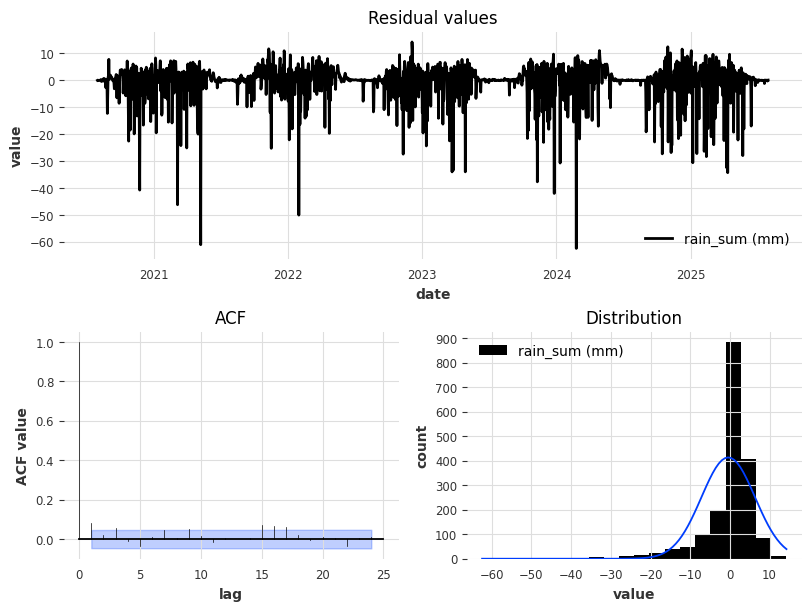

In [46]:
from darts.utils.statistics import plot_residuals_analysis

plot_residuals_analysis(residuals)

In [47]:
forecast_df = forecast.to_dataframe()
forecast_df.columns = ['predicted_rain']
residuals_df = pd.concat([test_serie.to_dataframe(),forecast_df],axis=1)

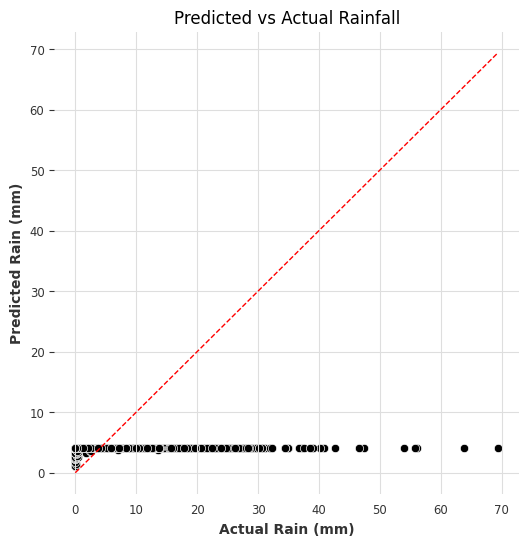

In [48]:
# scatterplot actual vs predicted
plt.figure(figsize=(6,6))
sns.scatterplot(x="rain_sum (mm)", y="predicted_rain", data=residuals_df)


# Reference line
lims = [
    np.min([residuals_df['rain_sum (mm)'].min(), residuals_df['predicted_rain'].min()]),
    np.max([residuals_df['rain_sum (mm)'].max(), residuals_df['predicted_rain'].max()])
]
plt.plot(lims, lims, '--', color='red', linewidth=1)  

plt.xlabel("Actual Rain (mm)")
plt.ylabel("Predicted Rain (mm)")
plt.title("Predicted vs Actual Rainfall")

plt.show()


**Residual Analysis and Skewness**

The distribution of residuals is right-skewed, indicating that the model tends to underpredict rain values. This skewness can likely be attributed to the presence of outliers in the target variable. As previously observed, out of 9,121 days, only 190 days recorded more than 20 mm of rainfall, confirming the rarity and extremity of these values.

**Potential Mitigation Strategies**
To address this issue and reduce prediction bias, we can explore the following strategies:

1- **Outlier Handling**
* Remove or cap extreme outliers in the target.
* Use extrapolation or other imputation techniques to replace them with more reasonable values.

2- **Feature Scaling**
* Apply standardization to input features to stabilize learning and improve model sensitivity to all ranges of values.

3- **Target Transformation**
* Apply transformations such as Box-Cox or log1p to reduce the skewness of the target variable and bring it closer to a normal distribution.

4- **Sample Weighting**
* Assign lower weights to extreme samples during training to reduce their influence on the overall error minimization.

In [49]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from sklearn.preprocessing import PowerTransformer
from scipy.stats import skew


transformed_data, lambda_val = boxcox(df['rain_sum (mm)']+1e-6)
logged_data = np.log1p(df['rain_sum (mm)'])

yj_transformer = PowerTransformer(method='yeo-johnson')
yj_rain = yj_transformer.fit_transform(df[['rain_sum (mm)']])

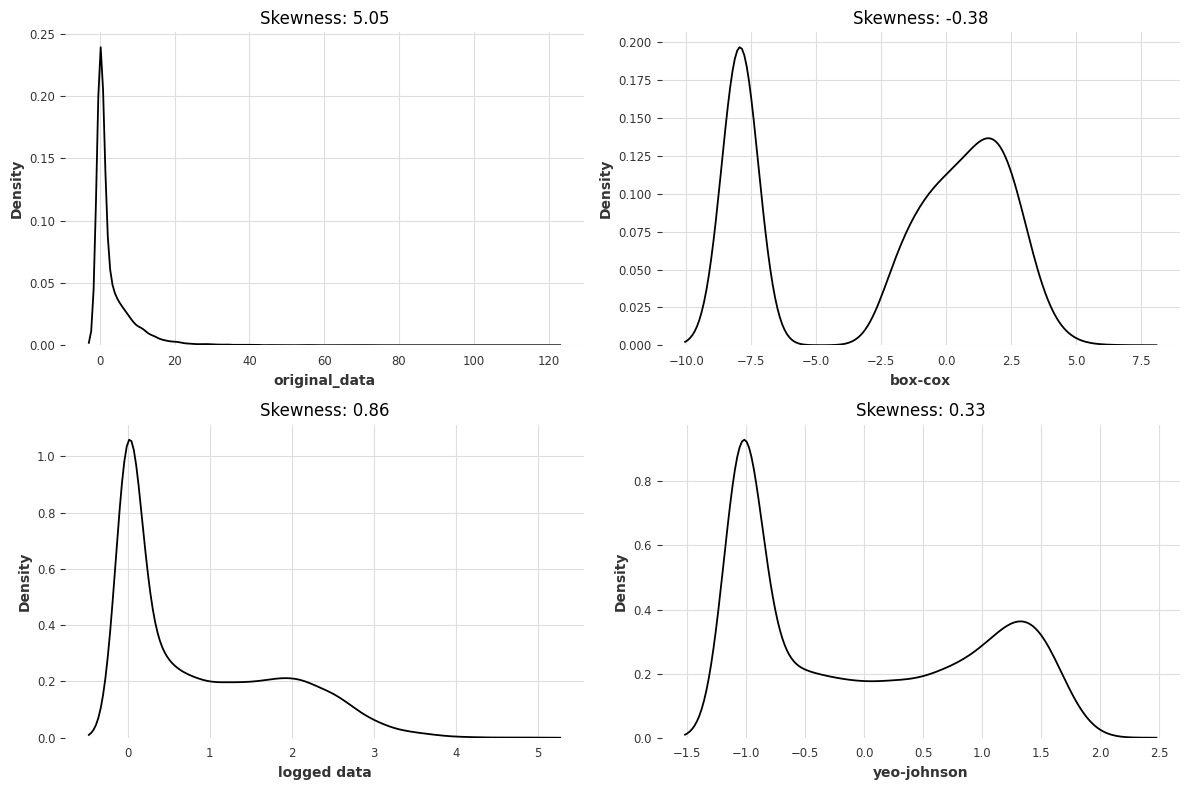

In [50]:
from scipy.stats import skew

fig , axs = plt.subplots(ncols=2 , nrows = 2 , figsize=(12,8))
axs = axs.flatten()

data = [df['rain_sum (mm)'], transformed_data , logged_data , yj_rain.ravel()]
labels = ['original_data','box-cox','logged data','yeo-johnson']

for i , ax in enumerate(axs):
    sns.kdeplot(data[i] , ax=ax)
    ax.set_xlabel(labels[i])
    ax.set_title(f"Skewness: {skew(data[i]):.2f}")
plt.tight_layout()
plt.show()

In [51]:
# Initialize outside functions if using Yeo-Johnson
yj_transformer = PowerTransformer(method='yeo-johnson', standardize=True)

# --- Transformations ---

def no_transform(data):
    return data

def log_transform(data):
    return data.map(np.log1p)

def boxcox_transform(data, epsilon=1e-6, lamda_val=None, set_='train'):
    if set_ == 'train':
        transformed, lamda_val = boxcox(data.values().ravel() + epsilon)
    else:
        transformed = boxcox(data.values().ravel() + epsilon, lmbda=lamda_val)
        
    series = pd.Series(transformed, index=data.time_index)
    return TimeSeries.from_series(series), lamda_val

def yj_ptransform(data, set_='train'):
    if set_ == 'train':
        transformed = yj_transformer.fit_transform(data.values())
    else:
        transformed = yj_transformer.transform(data.values())

    series = pd.Series(transformed.ravel(), index=data.time_index)
    return TimeSeries.from_series(series)

# --- Inverse Transformations ---

def unlog_data(pred):
    return pred.map(np.expm1)

def inv_boxcox_transform(boxcox_pred, lamda, epsilon=1e-6):
    inv = inv_boxcox(boxcox_pred.values().ravel(), lamda) - epsilon
    series = pd.Series(inv, index=boxcox_pred.time_index)
    return TimeSeries.from_series(series)

def inv_yj_transform(yj_pred):
    inv = yj_transformer.inverse_transform(yj_pred.values())
    series = pd.Series(inv.ravel(), index=yj_pred.time_index)
    return TimeSeries.from_series(series)


In [52]:
# let's test to see if our functions work as intended
def test_transforms_inverse(train_series, atol=1e-6):
    """
    Test if Box-Cox followed by its inverse returns the original series
    within numerical tolerance.
    """
    #=========== Box-Cox transform=========================
    transformed, lam = boxcox_transform(train_series)

    # Inverse Box-Cox
    recovered = inv_boxcox_transform(transformed, lam)


    # Test 1: Shapes match
    assert recovered.shape == train_series.shape, "Shape mismatch"

    # Test 2: All values close to original
    assert np.allclose(recovered.values(), train_series.values(), atol=atol), \
        f"Mismatch after inverse transform. Max error: {np.max(np.abs(recovered - train_series))}"

    # Test 3: Lambda is not None or NaN
    assert lam is not None and not np.isnan(lam), "Invalid lambda parameter"

    print("✅ Box-Cox and its inverse passed all tests!")
    
    #=========== Log transform=========================
    
    # log transform
    transformed = log_transform(train_series)

    # Inverse log transform
    recovered = unlog_data(transformed)


    # Test 1: Shapes match
    assert recovered.shape == train_series.shape, "Shape mismatch"

    # Test 2: All values close to original
    assert np.allclose(recovered.values(), train_series.values(), atol=atol), \
        f"Mismatch after inverse transform. Max error: {np.max(np.abs(recovered - train_series))}"

    print("✅ Yeo-Johnson and its inverse passed all tests!")
    
    #=========== Yeo-Johnsonn transform=========================
    
    # Yeo-Johnsonn transform
    transformed = yj_ptransform(train_series)

    # Inverse Yeo-Johnsonn transform
    recovered = inv_yj_transform(transformed)


    # Test 1: Shapes match
    assert recovered.shape == train_series.shape, "Shape mismatch"

    # Test 2: All values close to original
    assert np.allclose(recovered.values(), train_series.values(), atol=atol), \
        f"Mismatch after inverse transform. Max error: {np.max(np.abs(recovered - train_series))}"

    print("✅ Log Transform and its inverse passed all tests!")


    

# Test  transforms
test_transforms_inverse(train_serie)

✅ Box-Cox and its inverse passed all tests!
✅ Yeo-Johnson and its inverse passed all tests!
✅ Log Transform and its inverse passed all tests!


In [53]:
catboost_model = CatBoostModel(
    lags=1,      
    lags_past_covariates = 4,
    output_chunk_length=1,        
    n_estimators=300,             
    learning_rate=0.05,          
    max_depth=5,                  
    num_leaves=31,                
    random_state=42,              
    verbose=-1,   
    multi_models=True
)

In [54]:
# let's test the result of our transformations

model = catboost_model

transforms = [ no_transform, log_transform , boxcox_transform ,yj_ptransform ]
inverse_transforms = [no_transform , unlog_data , inv_boxcox_transform , inv_yj_transform]
methods = ['No Method','Logged Target', 'Box-cox transformed target','Yeo-Johnsonn transformed target']

for i, transform in enumerate(transforms):
    
    # Apply transform
    if transform != boxcox_transform:
        transformed_train = transform(train_serie)
    else:
        transformed_train, lam = transform(train_serie)

    # Fit model on transformed data
    model.fit(transformed_train, past_covariates=train_past_covariates)

    # Predict
    forecast_transformed = model.predict(len(test_serie), past_covariates=test_past_covariates)

    # Inverse transform forecast
    if transform != boxcox_transform:
        forecast_unscaled = inverse_transforms[i](forecast_transformed)
    else:
        forecast_unscaled = inverse_transforms[i](forecast_transformed, lam)

    # Evaluate
    print(f'======================={methods[i]}=================================')
    print(f"RMSE: {rmse(test_serie, forecast_unscaled):.2f}")
    print(f"MAE: {mae(test_serie, forecast_unscaled):.2f}")
    print("\n")    

=======================No Method=================================
RMSE: 6.77
MAE: 3.91


=======================Logged Target=================================
RMSE: 7.22
MAE: 3.62


=======================Box-cox transformed target=================================
RMSE: 7.74
MAE: 3.71


=======================Yeo-Johnsonn transformed target=================================
RMSE: 7.53
MAE: 3.65




The model shows improved performance in predicting average values, as indicated by the better MAE scores when using target transformations such as log, Box-Cox, or Yeo-Johnson. However, these transformations tend to compress the scale of the data, which reduces the model’s sensitivity to outliers. Consequently, after inverting the transformations, errors on these extreme values become amplified, leading to worse performance on metrics sensitive to outliers like RMSE and R².

To address this issue, we plan to explore several strategies:

* **Applying sample weights** to reduce the influence of outliers during training, effectively balancing the model’s focus between typical and extreme values.

* Experimenting with **alternative loss functions** such as Huber loss or quantile loss that are more robust to outliers.

* Combining multiple models through **ensembling**, for example merging models trained on transformed targets with those trained on raw targets, to leverage their complementary strengths.

These approaches aim to mitigate the impact of outliers without sacrificing the model’s ability to accurately predict the bulk of the data, ultimately improving overall forecast quality

In [94]:
tweedie_model = RegressionModel(
    model=TweedieRegressor(power=1.5, alpha=0.1, max_iter=1000),
    lags=1,
    lags_past_covariates=3,
    output_chunk_length=1
)

In [164]:
from darts.models import RegressionEnsembleModel

model = RegressionEnsembleModel(
    forecasting_models = [
        catboost_model,
        xbg_model,
        

    ],
    regression_train_n_points=20,
    train_forecasting_models=False
)

In [87]:
from sklearn.linear_model import TweedieRegressor
from darts.models import RegressionModel

model = RegressionModel(
    model=TweedieRegressor(power=1.5, alpha=0.1, max_iter=1000),
    lags=1,
    lags_past_covariates=3,
    output_chunk_length=1
)

In [170]:
eval_model(model)

model RegressionEnsembleModel(train_forecasting_models=False, forecasting_models=[CatBoostModel(lags=1, lags_past_covariates=4, lags_future_covariates=None, output_chunk_length=1, output_chunk_shift=0, add_encoders=None, likelihood=None, quantiles=None, random_state=42, multi_models=True, use_static_covariates=True, categorical_past_covariates=None, categorical_future_covariates=None, categorical_static_covariates=None, n_estimators=300, learning_rate=0.05, max_depth=5, num_leaves=31, verbose=-1), XGBModel(lags=2, lags_past_covariates=4, lags_future_covariates=None, output_chunk_length=1, output_chunk_shift=0, add_encoders=None, likelihood=None, quantiles=None, random_state=42, multi_models=True, use_static_covariates=True, objective=reg:tweedie, tweedie_variance_power=1.5, n_estimators=300, learning_rate=0.05, max_depth=5, num_leaves=31, verbose=-1)], regression_train_n_points=20) obtains RMSE: 28.31
model RegressionEnsembleModel(train_forecasting_models=False, forecasting_models=[Cat

### Hyperparameter Tuning

In [56]:
import optuna

In [178]:
def objective(trial):
    # Suggest hyperparameters
    lags = trial.suggest_int("lags", 1, 10)
    lags_past_covariates = trial.suggest_int("lags_past_covariates", 1, 10)
    n_estimators = trial.suggest_int("n_estimators", 100, 500)
    learning_rate = trial.suggest_float("learning_rate", 1e-3, 0.1, log=True)
    max_depth = trial.suggest_int("max_depth", 3, 10)

    # Initialize model with trial hyperparams
    model = CatBoostModel(
        lags=lags,
        lags_past_covariates=lags_past_covariates,
        output_chunk_length=1,
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        random_state=42,
        verbose=-1,
        multi_models=True,
    )

    # Train model
    model.fit(train_serie, past_covariates=train_past_covariates)

    # Predict and evaluate
    forecast = model.predict(len(test_serie), past_covariates=test_past_covariates)

    error = rmse(test_serie, forecast)  # Or mae(test_serie, forecast)
    return error

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=500)

print("Best params:", study.best_params)
print("Best RMSE:", study.best_value)


[I 2025-08-09 13:58:19,633] A new study created in memory with name: no-name-af36adff-4386-4a92-9a78-039479e1c647
[I 2025-08-09 13:58:22,997] Trial 0 finished with value: 6.820941111750465 and parameters: {'lags': 3, 'lags_past_covariates': 2, 'n_estimators': 145, 'learning_rate': 0.05236842235701932, 'max_depth': 5}. Best is trial 0 with value: 6.820941111750465.
[I 2025-08-09 13:58:35,314] Trial 1 finished with value: 7.4624139829679 and parameters: {'lags': 10, 'lags_past_covariates': 7, 'n_estimators': 194, 'learning_rate': 0.0011602239730849795, 'max_depth': 9}. Best is trial 0 with value: 6.820941111750465.
[I 2025-08-09 13:58:39,608] Trial 2 finished with value: 7.237583426536373 and parameters: {'lags': 2, 'lags_past_covariates': 2, 'n_estimators': 360, 'learning_rate': 0.001633254824706096, 'max_depth': 6}. Best is trial 0 with value: 6.820941111750465.
[I 2025-08-09 13:58:43,897] Trial 3 finished with value: 7.3337414013559385 and parameters: {'lags': 3, 'lags_past_covariates

Best params: {'lags': 1, 'lags_past_covariates': 8, 'n_estimators': 500, 'learning_rate': 0.04731969574429225, 'max_depth': 8}
Best RMSE: 6.664995682513665


In [58]:
def objective(trial):
    # Hyperparameters to tune
    lags = trial.suggest_int("lags", 1, 10)
    lags_past_covariates = trial.suggest_int("lags_past_covariates", 1, 10)
    learning_rate = trial.suggest_float("learning_rate", 1e-3, 0.1, log=True)
    max_depth = trial.suggest_int("max_depth", 3, 12)
    num_leaves = trial.suggest_int("num_leaves", 16, 256)
    n_estimators = trial.suggest_int("n_estimators", 100, 500)
    tweedie_variance_power = trial.suggest_float("tweedie_variance_power", 1.1, 1.9)


    # Initialize LightGBMModel
    model = LightGBMModel(
        lags=lags,
        lags_past_covariates=lags_past_covariates,
        output_chunk_length=1,
        objective="tweedie",
        tweedie_variance_power=tweedie_variance_power,
        learning_rate=learning_rate,
        max_depth=max_depth,
        num_leaves=num_leaves,
        n_estimators=n_estimators,
        random_state=42,
        verbosity=-1,
        multi_models=True
    )

    # Fit
    model.fit(train_serie, past_covariates=train_past_covariates)

    # Predict
    forecast = model.predict(len(test_serie), past_covariates=test_past_covariates)

    # Evaluate
    error = rmse(test_serie, forecast)
    return error

# Run the study
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=500)

print("Best params:", study.best_params)
print("Best RMSE:", study.best_value)


[I 2025-08-09 18:39:25,913] A new study created in memory with name: no-name-12be3e79-0e66-4ae5-a02b-e94b37ace709
[I 2025-08-09 18:39:33,419] Trial 0 finished with value: 7.308314520508526 and parameters: {'lags': 5, 'lags_past_covariates': 8, 'learning_rate': 0.0011399483188281642, 'max_depth': 8, 'num_leaves': 255, 'n_estimators': 496, 'tweedie_variance_power': 1.685261757249895}. Best is trial 0 with value: 7.308314520508526.
[I 2025-08-09 18:39:38,015] Trial 1 finished with value: 7.47880114246013 and parameters: {'lags': 9, 'lags_past_covariates': 6, 'learning_rate': 0.07605784886002896, 'max_depth': 11, 'num_leaves': 208, 'n_estimators': 346, 'tweedie_variance_power': 1.8000044148495646}. Best is trial 0 with value: 7.308314520508526.
[I 2025-08-09 18:39:40,237] Trial 2 finished with value: 7.022109561672904 and parameters: {'lags': 9, 'lags_past_covariates': 2, 'learning_rate': 0.06640463074966757, 'max_depth': 9, 'num_leaves': 78, 'n_estimators': 166, 'tweedie_variance_power': 

Best params: {'lags': 8, 'lags_past_covariates': 7, 'learning_rate': 0.06466929466902333, 'max_depth': 4, 'num_leaves': 158, 'n_estimators': 233, 'tweedie_variance_power': 1.1347374381797941}
Best RMSE: 6.743360887764685


### Let's improve our evaluation strategy

Let's perform backtesting to have a more robust evaluation of our models performance

In [60]:
def backtesting(model, series, past_covariates, start_date, horizon, stride):
    """
    Runs model backtesting with custom RMSE metric that unscales and unlogs predictions.

    Args:
        model: Darts model instance, already trained or untrained.
        series: TimeSeries to forecast.
        past_covariates: TimeSeries of past covariates.
        start_date: float or pd.Timestamp for backtest start (e.g. 0.8 for 80%).
        horizon: int forecast horizon.
        stride: int stride between backtest windows.
        scaler: the scaler instance used to inverse transform.

    Returns:
        float: average RMSE on original scale.
    """
    metric_fn = rmse

    backtest_score = model.backtest(
        series=series,
        past_covariates=past_covariates,
        start=start_date,
        forecast_horizon=horizon,
        stride=stride,
        metric=metric_fn,
        reduction=np.mean,
        retrain=True,
        overlap_end=False,
        last_points_only=False,
    )
    return backtest_score


In [61]:
backtesting(model= catboost_model ,
            series = rain_series,
            past_covariates = past_covariates,
            start_date = 0.7,
            horizon=7 , 
            stride = 1,

            
           )

5.250252631844443